# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Import `passengers.csv` and view the head.

In [2]:
# Read the dataset 'passengers.csv' and view the head
df_passengers = pd.read_csv('passengers.csv')
df_passengers.head()
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [3]:
# Set month column as a timeseries object, and make it the index
df_passengers.Month = pd.to_datetime(df_passengers.Month)
df_passengers.set_index('Month', inplace = True)
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
# check the head and the new index
print(df_passengers.head())
print(df_passengers.index)
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

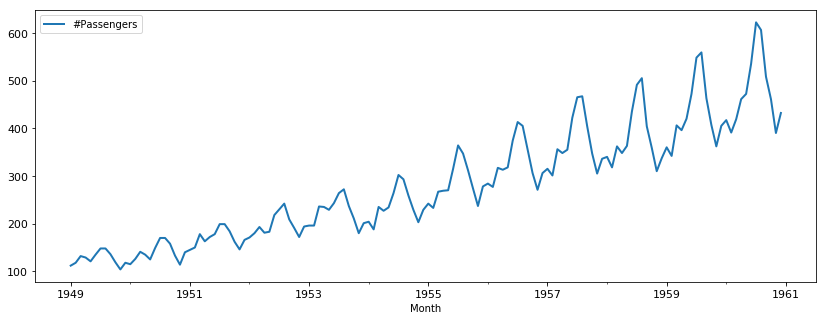

In [5]:
# Plot the time series data 
df_passengers.plot(figsize=(14,5), linewidth=2, fontsize=11);

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [6]:
#Determine rolling statistics
roll_mean = df_passengers.rolling(window = 12, center = False).mean()
roll_std = df_passengers.rolling(window = 12, center = False).std()

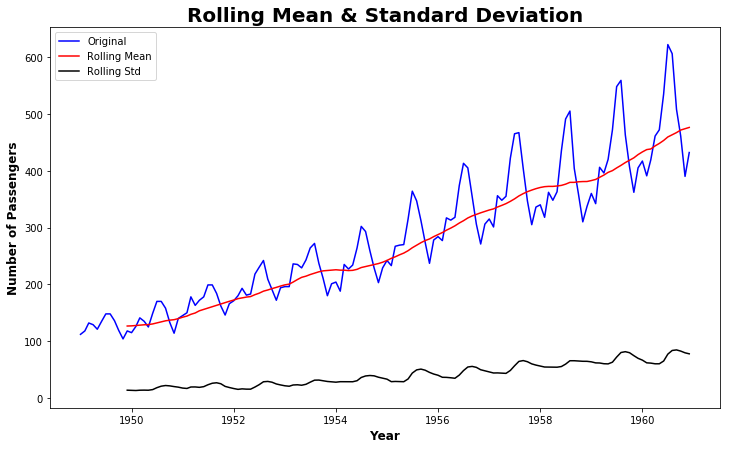

In [7]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df_passengers, color='blue',label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation', fontweight='bold', fontsize=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.show(block=False)

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [10]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_passengers['#Passengers'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Conclusion here

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [11]:
# Read the dataset 'passengers.csv' and view the head
df_NYSE_monthly = pd.read_csv('NYSE_monthly.csv')
df_NYSE_monthly.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [12]:
# Set month column as a timeseries object, and make it the index
df_NYSE_monthly.Month = pd.to_datetime(df_NYSE_monthly.Month)
df_NYSE_monthly.set_index('Month', inplace = True)
df_NYSE_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
monthly_return    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [13]:
# check the head and the new index
print(df_NYSE_monthly.head())
print(df_NYSE_monthly.index)
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

            monthly_return
Month                     
1961-01-01           0.082
1961-02-01           0.059
1961-03-01           0.050
1961-04-01           0.008
1961-05-01           0.042
DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

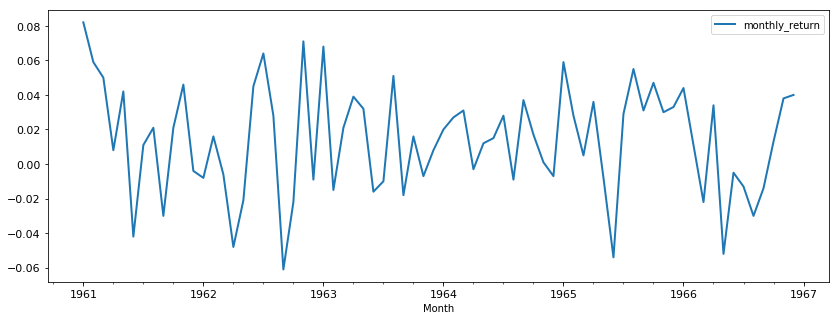

In [14]:
# Plot the time series data 
df_NYSE_monthly.plot(figsize=(14,5), linewidth=2, fontsize=11);

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [16]:
#Determine rolling statistics
roll_mean = df_NYSE_monthly.rolling(window = 12, center = False).mean()
roll_std = df_NYSE_monthly.rolling(window = 12, center = False).std()

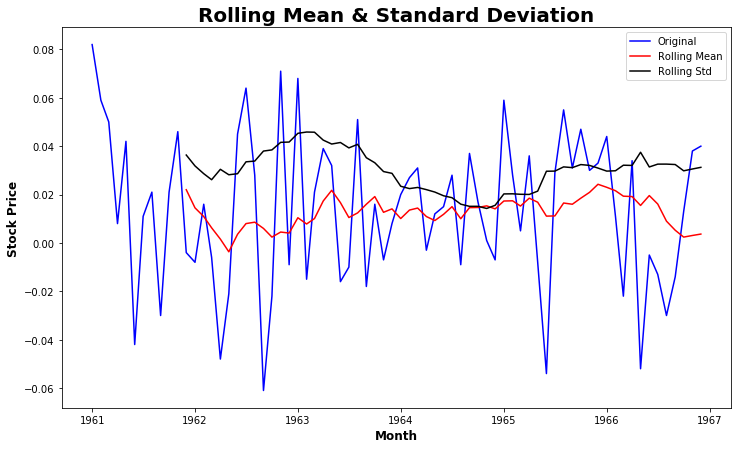

In [17]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,7))
orig = plt.plot(df_NYSE_monthly, color='blue',label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Stock Price', fontsize=12, fontweight='bold')
plt.show(block=False)

The mean is relatively stable at around 0.01. Both mean and standard deviation have some variation but not significant enough to discount it as a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [20]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_NYSE_monthly['monthly_return'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


__Conclusion__
<br> The small p-value within the alpha theshold allows us the reject the null hypothesis and conclude that this time series is stationary. This confirms our results from the rolling stats test above.

## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!